In [1]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pandas as pd
import matplotlib.pyplot as plt

https://translated.turbopages.org/proxy_u/en-ru.ru.0bcb0359-6497f5ea-b7852b33-74722d776562/https/www.projectpro.io/article/how-to-build-arima-model-in-python/544

In [17]:
data = pd.read_csv('for_eda_data.csv')
# data.sample(5)

In [ ]:
countries = data['COUNTRY_NAME'].unique()

for country in countries:
    print(country)

    country_data = data[data['COUNTRY_NAME'] == country]
    res = adfuller(country_data.DETAILED_CASES_CONFIRMED)
#     result = seasonal_decompose(country_data.DETAILED_CASES_CONFIRMED, model='additive', period=3)
   
    # The Genuine Series
    fig,axes = plt.subplots(3, 2, sharex = True)
    axes[0, 0].plot(country_data.DETAILED_CASES_CONFIRMED); axes[0, 0].set_title('The Genuine Series')
    plot_acf(country_data.DETAILED_CASES_CONFIRMED, ax = axes[0, 1])
    
    
    axes[1, 0].plot(country_data.DETAILED_CASES_CONFIRMED.diff());axes[1, 0].set_title('Order of Diff: First')
    plot_acf(country_data.DETAILED_CASES_CONFIRMED.diff().dropna(), ax = axes[1, 1])

    
    axes[2, 0].plot(country_data.DETAILED_CASES_CONFIRMED.diff().diff()); axes[2, 0].set_title('Order of Diff: Second')
    plot_acf(country_data.DETAILED_CASES_CONFIRMED.diff().diff().dropna(), ax = axes[2, ])
    
    plot.show()
    
    print(f'count axis0: {country_data.shape[0]}')
#     print(result.seasonal)
    print(res[0])
    print(f'p-value: {res[1]}\n')
    

In [5]:
latvia_data = data[data.COUNTRY_NAME == 'Latvia']


## Подбор гипперпараметров модели ARIMA для коэф. Beta

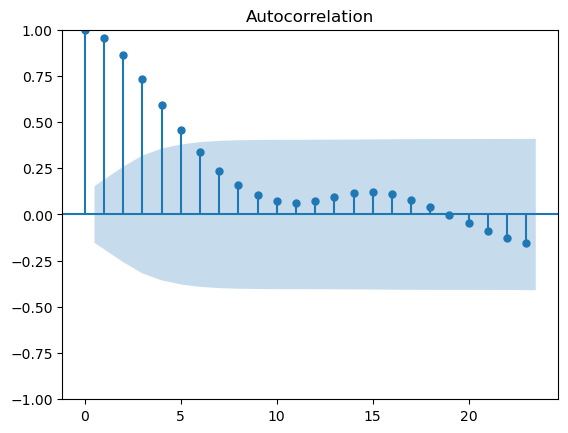

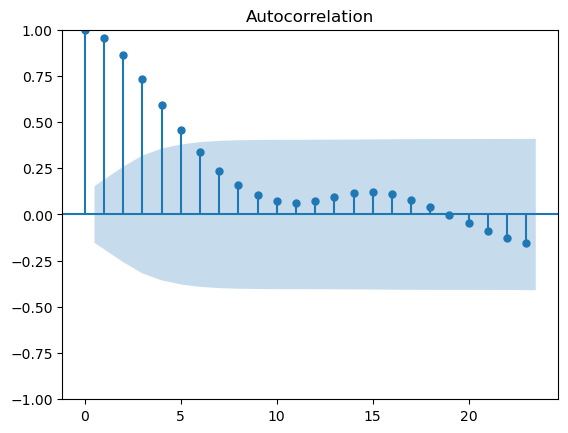

In [8]:
plot_acf(latvia_data.Betta)

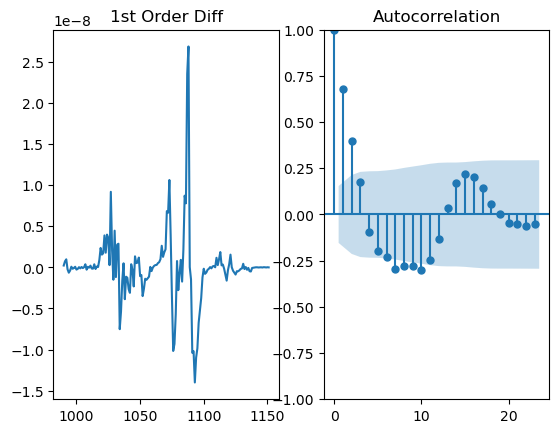

In [9]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('1st Order Diff')
ax1.plot(latvia_data.Betta.diff())

ax2 = f.add_subplot(122)
plot_acf(latvia_data.Betta.diff().dropna(), ax=ax2)

plt.show()

слабо выраженная сезонная компанента

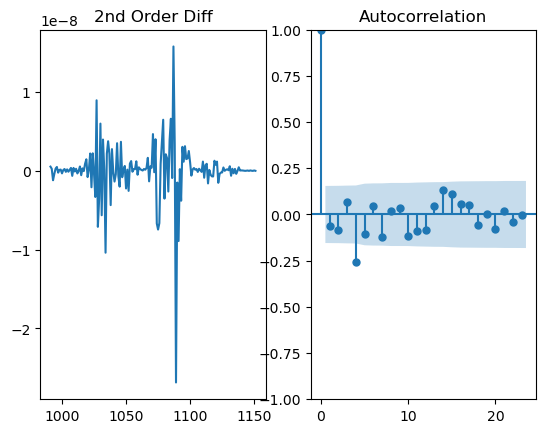

In [11]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Diff')
ax1.plot(latvia_data.Betta.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(latvia_data.Betta.diff().diff().dropna(), ax=ax2)

plt.show()

при повторном диффиренцировании сезонность стала ещё менее заметна.
Также, можно сразу отметить, что параметру скользящей средней("q") можно присвоить значение 2, глядя на кол-во задержек, пересекающих пороговое значение.

Посмотрим, на рассширенный тест Дики-Фуллера

In [12]:
result = adfuller(latvia_data.Betta.dropna())
print(f'p-value data -- {result[1]}')

result = adfuller(latvia_data.Betta.diff().dropna())
print(f'p-value 1st diff -- {result[1]}')

result = adfuller(latvia_data.Betta.diff().diff().dropna())
print(f'p-value 2nd diff -- {result[1]}')

p-value data -- 0.00038009095131810597
p-value 1st diff -- 3.92215125994848e-09
p-value 2nd diff -- 8.616023439448164e-11


начиная с первого интегрирования значение p выходит за пределы допустимого порога. Следует, что можно рассматривать порядок разности ("d") как 0. Но для эксперемента, можно посмотреть, что будет при d = 1.

теперь надо вычислить порядок для авторегрессивной модели ("p"), для этого посторим PACF 

C:\Users\legyx\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


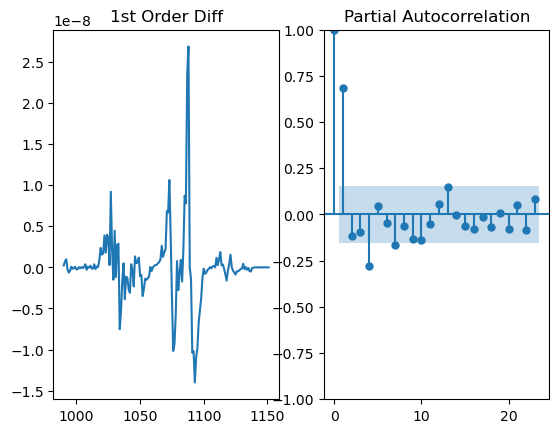

In [13]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('1st Order Diff')
ax1.plot(latvia_data.Betta.diff())

ax2 = f.add_subplot(122)
plot_pacf(latvia_data.Betta.diff().dropna(), ax=ax2)

plt.show()

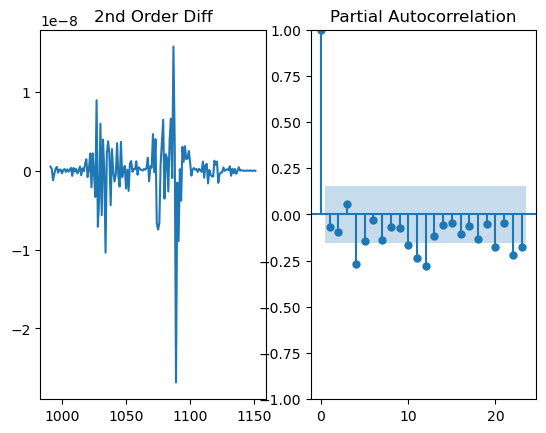

In [14]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Diff')
ax1.plot(latvia_data.Betta.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(latvia_data.Betta.diff().diff().dropna(), ax=ax2)

plt.show()

на обоих графиках 1е отставание наиболее значительно => можно считать "p" = 1.

таким образом, для параметра бета модель будет выглядеть следующим образом: ARIMA(p=1, d=0, q=2).

Можно ещё попробовать ARIMA(p=1, d=1, q=2)

## Подбор гипперпараметров модели ARIMA для коэф. Gamma

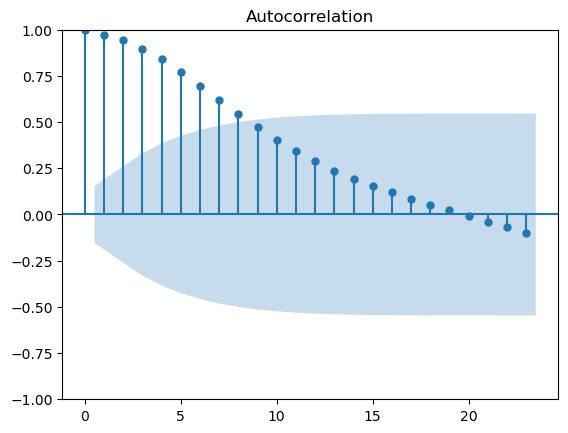

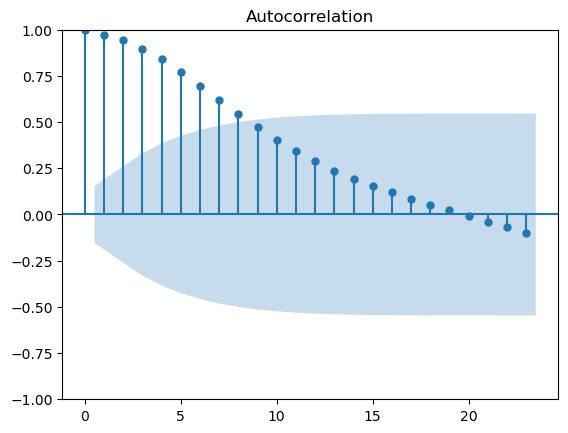

In [18]:
plot_acf(latvia_data.Gamma)

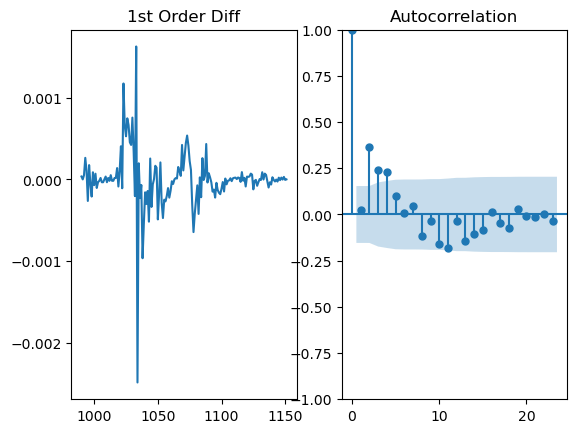

In [20]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('1st Order Diff')
ax1.plot(latvia_data.Gamma.diff())

ax2 = f.add_subplot(122)
plot_acf(latvia_data.Gamma.diff().dropna(), ax=ax2)

plt.show()

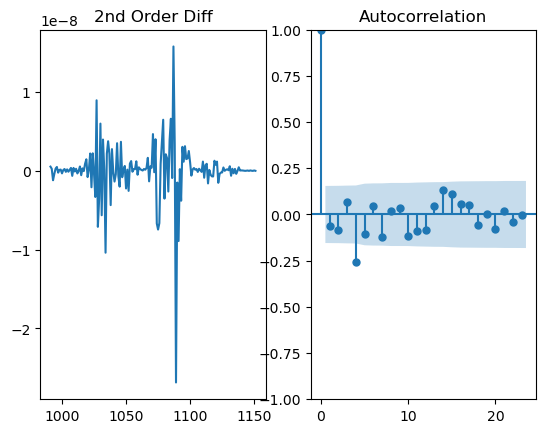

In [21]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Diff')
ax1.plot(latvia_data.Betta.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(latvia_data.Betta.diff().diff().dropna(), ax=ax2)

plt.show()

я бы принял q = 2

Тест Дики-Фуллера

In [23]:
result = adfuller(latvia_data.Gamma.dropna())
print(f'p-value data -- {result[1]}')

result = adfuller(latvia_data.Gamma.diff().dropna())
print(f'p-value 1st diff -- {result[1]}')

result = adfuller(latvia_data.Gamma.diff().diff().dropna())
print(f'p-value 2nd diff -- {result[1]}')

p-value data -- 0.08280237501340681
p-value 1st diff -- 8.561532634952114e-05
p-value 2nd diff -- 1.2060571722478407e-23


при d = 0, вероятность, что ряд стационарен, меньше 95%, поэтому основной задумкой будет d = 1, но также можно попробовать d = 0.

C:\Users\legyx\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


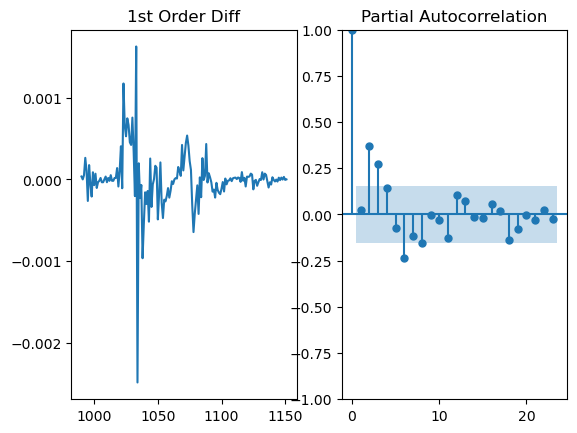

In [24]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('1st Order Diff')
ax1.plot(latvia_data.Gamma.diff())

ax2 = f.add_subplot(122)
plot_pacf(latvia_data.Gamma.diff().dropna(), ax=ax2)

plt.show()

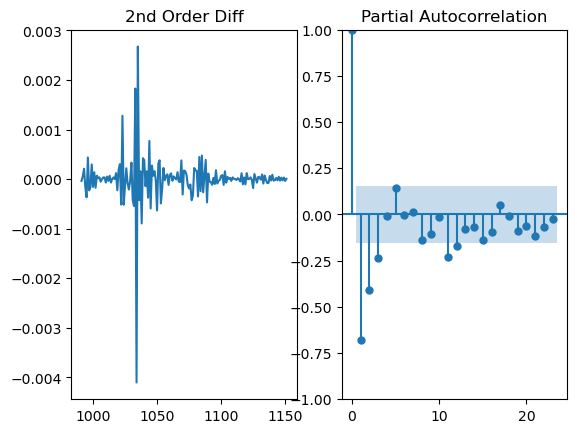

In [25]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Diff')
ax1.plot(latvia_data.Gamma.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(latvia_data.Gamma.diff().diff().dropna(), ax=ax2)

plt.show()

Для коэф. gamma доминирует первое отставание, однако при повтороном дифференцировании, появляется так же мощное 2е отставание. И всё же я приму, что p = 1

для коэф. gamma модель ARIMA примет следующий вид: ARIMA(p=1, d=1(0), q = 2)